<a href="https://colab.research.google.com/github/WagnerPrata/EstruturandoTXTWhatsApp/blob/main/Estruturando_TXT_do_WhatsApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BIBLIOTECAS USADAS** 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import seaborn as sns
from google.colab import files
import io
import re
import csv

In [ ]:
import os
from wordcloud import WordCloud

# **MANIPULANDO ARQUIVO TXT**


**FAZER DOWLOAND DO ARQUIVO**


In [ ]:
class Arquivo():
  _path :str
  def __init__(self,path):
    self. _path = path
  def mostrarConteudo(self):
    with(open(self._path, 'r', encoding='utf-8')) as arq:
      for item in arq:
        print(item)

In [ ]:
arquivo = Arquivo('/content/Conversa.txt')

In [ ]:
arquivo.mostrarConteudo()

# **ESTRUTURAR BASE DE DADOS**

In [ ]:
analise3 = pd.read_fwf(r"/content/Conversa.txt") 

In [ ]:
analise3.to_csv('Conversa.csv')

In [ ]:
with open("Conversa.csv", "r") as arquivo:
  arquivo_csv = csv.reader(arquivo, delimiter=",")
  for i, linha in enumerate(arquivo_csv):
    if i==23:
      print (linha)

In [ ]:
dados_selecionados = pd.read_csv('/content/Conversa.csv', usecols=[1,2,4])
dados_selecionados.head(5)

In [ ]:
dados_selecionados.rename(columns={'13/05/2021':'DATA','08:46':'HORA','As mensagens e as chamadas são protegidas com a criptografia de ponta a ponta e ficam somente entre você e os participantes desta conversa. Nem mesmo o WhatsApp pode ler ou ouvi-las. Toque para saber mais.':'MENSAGEM'}, inplace=True)

In [ ]:
dados_selecionados.to_csv('DADOS SELECIONADOS.csv')

In [ ]:
#analise3

In [ ]:
dados_selecionados.info()

In [ ]:
from pandas.core.frame import Axis
analise3.drop(['Unnamed: 4','Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7','Unnamed: 8','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11','Unnamed: 12','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15','Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18','Unnamed: 19','Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22','Unnamed: 23','Unnamed: 24'],axis=1)

In [ ]:
analise3.rename(columns={'13/05/2021':'DATA','08:46':'HORA','As mensagens e as chamadas são protegidas com a criptografia de ponta a ponta e ficam somente entre você e os participantes desta conversa. Nem mesmo o WhatsApp pode ler ou ouvi-las. Toque para saber mais.':'MENSAGEM'})

# **LIMPEZA DE DADOS**


In [ ]:
# Lendo o arquivo CSV e carregando para "data"
data = pd.read_csv("/content/DADOS SELECIONADOS.csv") 

In [ ]:
# Imprimindo Original no Console
#print(data)

In [ ]:
# Descartando colunas com valor nulo para evitar erros
data.dropna(inplace = True)

In [ ]:
# Nova Data com Split das coluna "Name" separado por espaços
new = data["MENSAGEM"].str.split(":", n = 1, expand = True)

In [ ]:
# Criando a Nova Coluna "USUARIO" com o new[0]
data["USUARIO"]= new[0] 

In [ ]:
# Criando a Nova Coluna "SOBRE NOME " com o new[1]
data["Mensagem"]= new[1] 

In [ ]:
# Retirando a antiga coluna "Name" 
data.drop(columns =["MENSAGEM"], inplace = True) 

In [ ]:
# Imprimindo Alteração no Console
data.head(100)

In [ ]:
data2 = data.drop_duplicates(subset='Mensagem',keep= False)

In [ ]:
data3 = data2.drop(['Unnamed: 0'],axis=1)

In [ ]:
data3.to_csv('DADOS SELECIONADOS2.csv')

# **NUVEM DE PALAVRAS**

In [ ]:
!pip install wordcloud -q

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
df = pd.read_csv("/content/DADOS SELECIONADOS2.csv") #lendo a base de dados duplicada

In [ ]:
# concatenar as frases
all_frases = " ".join(s for s in df['Mensagem'])
print("Quantidade de Palavras: {}".format(len(all_frases)))

Quantidade de Palavras: 44005


In [ ]:
#Palavras indesejaveis e sem sentido
stopwords = set(STOPWORDS)
stopwords.update(['eu','ver','principal','essa','isso','vez','nas','mas','qual',
                  'principal','ele','ter','doença','pois','este','vez','ver principal',
                  'artigo principal','já','aos','pode','outro','artigo','desse','alguns',
                  'meio','entre','das','podem','esse','seu','também','são','quando','de',
                  'que','em','os','as','da','como','dos','ou','se','um','uma','para',
                  'na','ao','mais','por','não','ainda','muito','sua', 'mídia',
                  'oculto','o','e','pra','vc', 'vcs'] + list(STOPWORDS))

In [ ]:
# configurando a wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white",
                      width=1600, height=800).generate(all_frases)
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

# mostrar a imagem
plt.imshow(wordcloud);

# salvar a imagem no diretório
wordcloud.to_file("wordcloud.png")

#**TOKENIZAÇÃO** -  Contagem de palavras

In [ ]:
#import Countvectorizar para cantar numero de vezes que uma palavra ocorre
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
df = pd.read_csv("/content/DADOS SELECIONADOS2.csv") 

In [ ]:
df.head(5)

In [ ]:
#Crie uma matriz para mostrar o número de vezes que palavras específicas aparecem no texto da coluna
cv = CountVectorizer()
count_matriz = cv.fit_transform(df.Mensagem)

In [ ]:
word_count = pd.DataFrame(cv.get_feature_names(), columns=['Palavras'])
word_count["Quantidade"] = count_matriz.sum(axis = 0).tolist()[0]
word_count = word_count.sort_values("Quantidade", ascending = False).reset_index(drop =True)
word_count[:100]


#**PREPARANDO A BASE DE DADOS** - Tradução

In [ ]:
!pip install translate -q

In [ ]:
from translate import Translator
from textblob import TextBlob
import translate

In [ ]:
for index, row in df.iterrows():
    pt_blob = df.iloc[index]['Mensagem']
    translator = Translator(from_lang="pt", to_lang="en")
    #translator = Translator(to_lang="en") #Traduzir para Inglês    pt_blob = translator.translate(pt_blob)
    en_blob = translator.translate(pt_blob)
    df.at[index, str('Mensagem')] = str(en_blob)
df.head(100)

,Unnamed: 0,DATA,HORA,USUARIO,Mensagem
0,15,13/05/2021,13:02,+55 79 9990-1718,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
1,16,13/05/2021,13:03,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
2,18,13/05/2021,13:19,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
3,23,05/06/2021,19:31,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
4,24,05/06/2021,19:32,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
...,...,...,...,...,...
95,223,20/07/2021,15:32,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
96,224,20/07/2021,15:32,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
97,225,20/07/2021,18:09,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...
98,230,21/07/2021,08:02,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...


In [ ]:
#trandformo o dataframe em um arquivo CSV - para aplicar a analise 
df.to_csv("traducao.csv")


In [ ]:
#Cria um dataframe especifico para analise 
analise = pd.read_csv("traducao.csv")

# **ANÁLISE DE TWIITER NEGATIVO E POSITIVO**

In [ ]:
from sklearn.metrics import accuracy_score #acuracia

In [ ]:
# Função que analisa e obtém a subjetividade
def capture_subjetividade_pt(text):
    return TextBlob(text).sentiment.subjectivity
# Função que analisa e obtém a polaridade
def capture_polaridade_pt(text):
    return  TextBlob(text).sentiment.polarity

#def translate_text(text): #Aqui encontramos limitações na quantidade de traduções 
      #translator = Translator(from_lang="pt", to_lang="en") #Traduzir de Portugues para Ingles
      #return translator.translate(text)

#Traduzindo
#df_tweets['Mensagem'] = df_tweets['Mensagem'].apply(translate_text)

# Criar duas colunas de subjetividade e polaridade

analise['Subjetividade'] = analise['Mensagem'].apply(capture_polaridade_pt)
analise['Polaridade'] = analise['Mensagem'].apply(capture_subjetividade_pt)

# Mostra um novo dataframe com as colunas subjetividade e polaridade
#analise.tail(10)

In [ ]:
# Mostra um novo dataframe com as colunas subjetividade e polaridade
analise.tail(10)

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,USUARIO,Mensagem,Subjetividade,Polaridade
974,974,2428,29/09/2022,20:47,Vanderson Abelhas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
975,975,2429,29/09/2022,20:48,Vanderson Abelhas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
976,976,2430,29/09/2022,20:50,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
977,977,2431,29/09/2022,21:34,Vanderson Abelhas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
978,978,2435,01/10/2022,11:04,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
979,979,2438,01/10/2022,12:56,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
980,980,2439,01/10/2022,12:56,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
981,981,2444,04/10/2022,10:52,Vanderson Abelhas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
982,982,2448,04/10/2022,12:01,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42
983,983,2455,06/10/2022,13:13,+55 79 9990-1718,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42


In [ ]:
#-1 negativo
#0 neutro
#1 positivo
def gerar_analise(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Negativo'
    else:
        return 'Positivo'
analise['Analise'] = analise['Polaridade'].apply(gerar_analise)

In [ ]:
analise.to_csv("Analise.csv") #Criando um arquivo CSV das Analise 

In [ ]:
analise

,Unnamed: 0,Unnamed: 0.1,DATA,HORA,USUARIO,Mensagem,Subjetividade,Polaridade,Analise
0,0,15,13/05/2021,13:02,+55 79 9990-1718,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
1,1,16,13/05/2021,13:03,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
2,2,18,13/05/2021,13:19,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
3,3,23,05/06/2021,19:31,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
4,4,24,05/06/2021,19:32,Daniel Tur,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
...,...,...,...,...,...,...,...,...,...
979,979,2438,01/10/2022,12:56,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
980,980,2439,01/10/2022,12:56,Sergio Estofados,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
981,981,2444,04/10/2022,10:52,Vanderson Abelhas,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo
982,982,2448,04/10/2022,12:01,Elias Mel,MYMEMORY WARNING: YOU USED ALL AVAILABLE FREE ...,0.34,0.42,Positivo


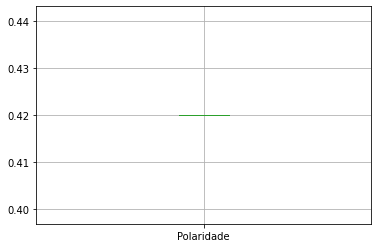

In [ ]:
from seaborn.categorical import boxplot
import matplotlib.pyplot as plt
analise.boxplot(column= ['Polaridade'])
plt.savefig('Boxplot_Polaridade.png', format='png')
plt.show()

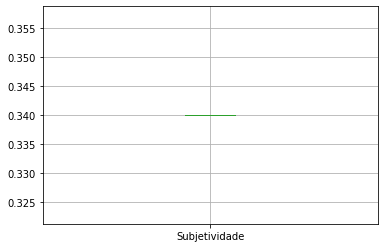

In [ ]:
import matplotlib.pyplot as plt
analise.boxplot(column= ['Subjetividade'])
plt.savefig('Boxplot_Subjetividade.png', format='png')
plt.show()

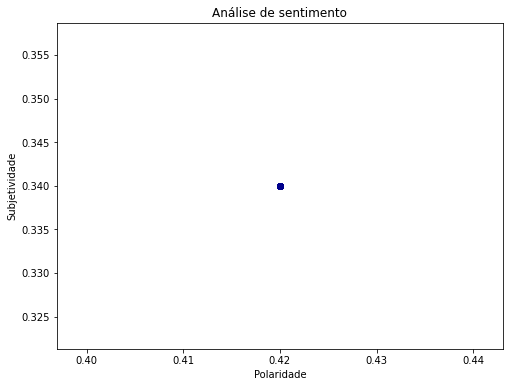

In [ ]:
# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, analise.shape[0]):
    plt.scatter(analise["Polaridade"][i], analise["Subjetividade"][i], color='darkblue') 
plt.title('Análise de sentimento') 
plt.xlabel('Polaridade') 
plt.ylabel('Subjetividade')
plt.savefig('Gráfico de dispersão.png', format='png')
plt.show()

In [ ]:
#Percentual de Mensagens positivos
ptweets = analise[analise.Analise == 'Positivo']
ptweets = ptweets['Mensagem']
ptweets

round( (ptweets.shape[0] / analise.shape[0]) * 100 , 1)

100.0

In [ ]:
#Percentual de Mensagens Negativa
ntweets = analise[analise.Analise == 'Negativo']
ntweets = ntweets['Mensagem']
ntweets

round( (ntweets.shape[0] / analise.shape[0]) * 100, 1)

0.0

In [ ]:
df = pd.DataFrame(analise['Analise'].value_counts())

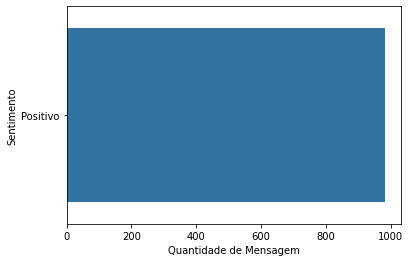

In [ ]:
plt.figure()
ax = sns.barplot(x=df['Analise'], y=df.index, data=analise)
ax.set_xlabel('Quantidade de Mensagem')
ax.set_ylabel('Sentimento');

plt.savefig('What-Gráfico Barra 01.png', format='png')
plt.show()

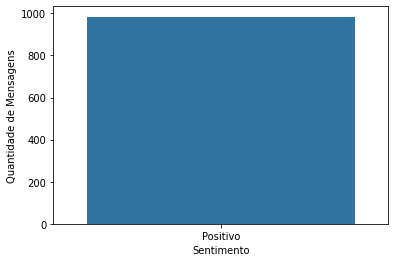

In [ ]:
ax = sns.barplot(x=df.index, y=df['Analise'],data=analise,label='Quantidade de Mensagens')
ax.set_ylabel('Quantidade de Mensagens')
ax.set_xlabel('Sentimento');
plt.savefig('What-Gráfico Barra 02.png', format='png')
plt.show()